# <div style="max-width: 900px;margin: 20px auto; padding:15px 15px;border:#000b2d ;background-color: #d6c5f5;border-radius:8px; border-width: 5px; box-shadow: 6px 6px 6px 6px rgba(0, 0, 0, 0.744);"><span style="color:#0486d3;"><span style="color:#7b0818;"><U><center> FRAUDLENT TRANSACTION DETECTION</center></U></span> </div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\DataScience\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### <span style="color:#0B867d;"> CHECKING FOR MISSING DATA</span>
We find the count of missing data in each column and then according to its result we'll take the action 

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### <span style="color:black;"> THE SAMPLE OF DATA USED FOR ANALYSIS</span>
As there are no missing data, hence no new imputation is needed we can get onto the data cleaning phase.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

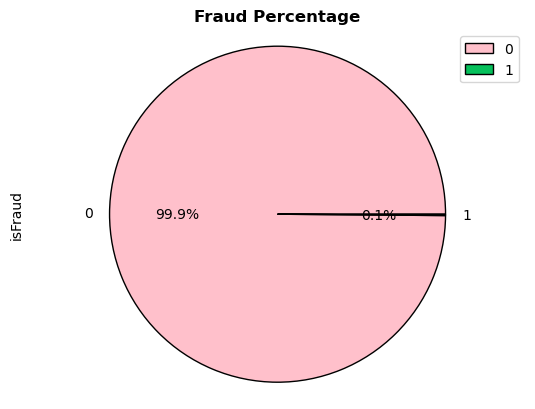

In [7]:
df['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops={"edgecolor":"black"}, colors=["pink","#06c05b"] )
plt.axis('equal')
plt.title("Fraud Percentage", fontweight="bold")
plt.legend()
plt.show()

### <span style="color:#8c5700">HIGLY IMBALANCED DATA </span>
As we can see that the data is highly imbalanced and we are required to under/over sample it else the model will have high bais for one target and will result in ubalanced fit.
So let's deep dive the data by looking for the similarities in data when it is fraud.

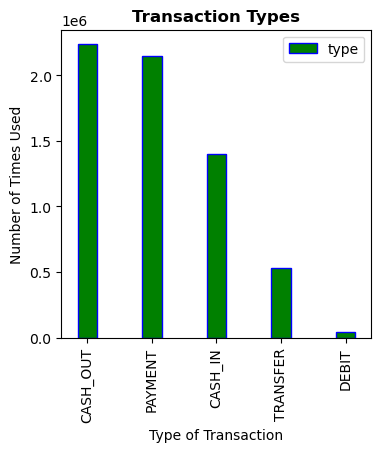

In [8]:
plt.rcParams['figure.figsize']=(4,4)
df['type'].value_counts().plot(kind='bar' ,color="green",width=0.3, edgecolor="blue")
plt.title("Transaction Types", fontweight="bold") 
plt.legend()
plt.axis()
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Times Used")
plt.show()

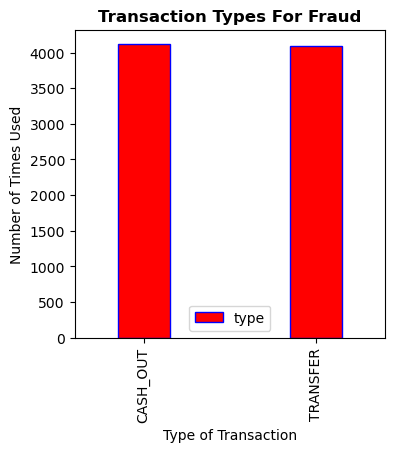

In [9]:
plt.rcParams['figure.figsize']=(4,4)
df[df['isFraud']==1].type.value_counts().plot(kind='bar' ,color="red",width=0.3, edgecolor="blue")
plt.title("Transaction Types For Fraud", fontweight="bold") 
plt.legend()
plt.axis()
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Times Used")
plt.show()

<h4><span style="color:black;"> INFERENCE </span></h4>
As it can be seen that fraudlent transactions happen only through cash out or transfer and its is almost equal in number so it is going to be quite import for us going ahead.

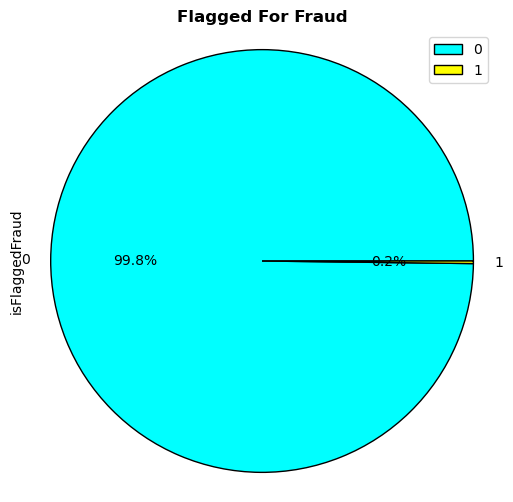

In [10]:
plt.rcParams['figure.figsize']=(6,6)
df[df['isFraud']==1].isFlaggedFraud.value_counts().plot(kind='pie' ,autopct='%1.1f%%', wedgeprops={"edgecolor":"black"}, colors=["cyan","yellow"] )
plt.title("Flagged For Fraud", fontweight="bold") 
plt.legend()
plt.axis('equal')
plt.show()

<h4><span style="color:black;">INFERENCE</span> </h4>
As it can be seen that fraudlent transactions are almost negligibily flagged as fraud so this column is not considering all the fraud conditions so major of the fraud transcations are other the ones flagged as fraud. 

### <span style="color:#a269f8;"> HANDLING OUTLIERS</span>

In [11]:
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    df[col] = np.where(df[col] > df[col].quantile(0.99), df[col].quantile(0.99), df[col])

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.839640e+03,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1.864280e+03,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,1.810000e+02,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,1.810000e+02,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,1.166814e+04,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,3.396821e+05,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,1.615979e+06,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,1.615979e+06,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,8.500025e+05,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### <span style="color:#4de65e;"> FEATURE ENGINEERING</span>

In [12]:
df['balanceOrig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [13]:
df[df['isFraud']==1].head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig_diff,balanceDest_diff
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,2806.00,0.00
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,2806.00,-26202.00
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,20128.00,0.00
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0,20128.00,5877.85
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0,0.00,9291517.62
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0,1277212.77,0.00
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0,1277212.77,2444985.19
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1,0,35063.63,0.00


In [14]:
df.drop(['step','nameOrig','nameDest'], axis=1,inplace=True)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig_diff,balanceDest_diff
0,PAYMENT,9.839640e+03,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00
1,PAYMENT,1.864280e+03,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00
2,TRANSFER,1.810000e+02,181.00,0.00,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,1.810000e+02,181.00,0.00,21182.00,0.00,1,0,181.00,-21182.00
4,PAYMENT,1.166814e+04,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,3.396821e+05,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,1.615979e+06,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,1.615979e+06,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,8.500025e+05,850002.52,0.00,0.00,0.00,1,0,850002.52,0.00


### <span style="color:#e6dc4d;"> ENCODING THE OBJECT DATA </span>

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df
                               

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig_diff,balanceDest_diff
0,3,9.839640e+03,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00
1,3,1.864280e+03,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00
2,4,1.810000e+02,181.00,0.00,0.00,0.00,1,0,181.00,0.00
3,1,1.810000e+02,181.00,0.00,21182.00,0.00,1,0,181.00,-21182.00
4,3,1.166814e+04,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...
6362615,1,3.396821e+05,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13
6362616,4,1.615979e+06,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00
6362617,1,1.615979e+06,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,4,8.500025e+05,850002.52,0.00,0.00,0.00,1,0,850002.52,0.00


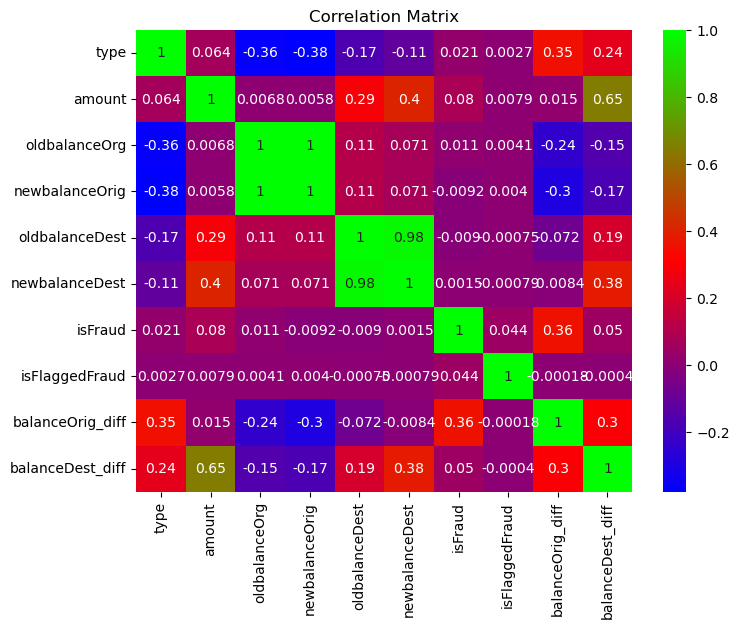

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='brg')
plt.title("Correlation Matrix")
plt.show()

In [17]:
X = df.drop('isFraud', axis=1).values
y = df['isFraud'].values

### <span style="color:#a269f8;"> BALANCING THE DATA (SYNTHETIC OVERSAMPLING) </span>

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=10, random_state=42)
X, y = sm.fit_resample(X, y)

### <span style="color:#e67e96;">SPLITING TRAINING AND TESTING DATA  </span>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### <span style="color:#e6817e;">SCALING THE TRAINING DATA </span>

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### <span style="color:#598d5f;">MODEL TRAINING </span>

In [22]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9141556583421745

### <span style="color:#1e0136;">PERFORMANCE EVALUATION </span>

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92   1906309
           1       0.95      0.88      0.91   1906336

    accuracy                           0.91   3812645
   macro avg       0.92      0.91      0.91   3812645
weighted avg       0.92      0.91      0.91   3812645



<h3><span style="color:black;">QUESTIONS TO BE ANSWERED</span></h3>

1. Data cleaning including missing values, outliers and multi-collinearity.<br>
There were no missing data in the dataset so no measures where taken for them, and outliers where managed using capping. Also the data was highly unbalanced so we used SMOTE to balance the dataset to reudce the bais..
2. Describe your fraud detection model in elaboration.<br>
I used a classification model to detect fraud but initally I collected the data, then cleaned the data, did some basic visualisations, added some preprocessing then divided the data into training and testing data where I scaled the training data and impleted into my basic binary classification model of logistic regression and then analysed its accuracy.
3. How did you select variables to be included in the model?<br>
I checked the effect of different variables over the target ouput and I dropped few features like STEP, Sender, Reciever as they won't have effected the model.  
4. Demonstrate the performance of the model by using best set of tools.<br>
The model performance is demonstrated using the built-in classification report which shows the precison, recall, F1-score, accuracy etc.
5. What are the key factors that predict fraudulent customer?<br>
Frauds mainly occurs in Cashout or transfer transcations, when the whole account is emptied in a single transcation then also it is a fraud transcation, also when the transaction amount doesnt get reflected into the receiver's new balance then it is a fraud transaction. These are the three key factors of fraud transactions. 
6. Do these factors make sense? If yes, How? If not, How not?<br>
Yes they make as they clearly show that the amount was withdrwan illegally and it never reached the reciever which it was meant to.
7. What kind of prevention should be adopted while company update its infrastructure?<br>
Not allowing the CashOut and Tranfers for big amount, Not allowing the whole money in a single transaction, tokenizing the transaction so that money doesnot get deducted untill merchant is ready to receive.
8. Assuming these actions have been implemented, how would you determine if they work?<br>
By again analysing the reports after few months of implementation of these steps.